<a href="https://colab.research.google.com/github/Dyuko/spaCy_NLTK_example/blob/main/tEps2_tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

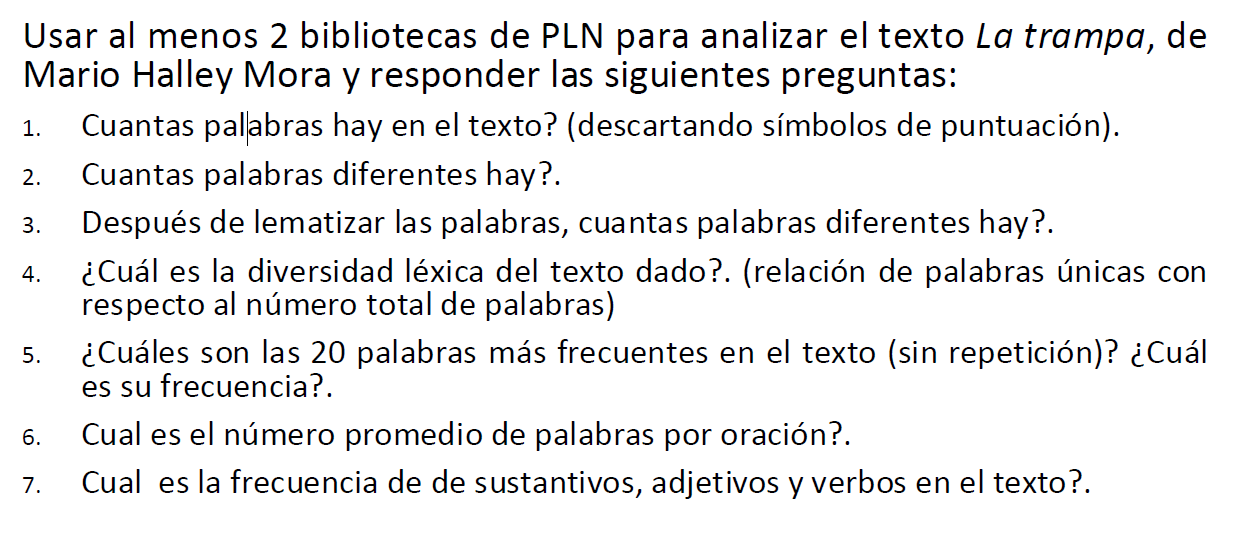

In [20]:
# Instalar spaCy si no lo tienes instalado
#!pip install spacy

# Descargar el modelo de lenguaje español
#!python -m spacy download es_core_news_sm

In [21]:
# NLTK
import nltk
from nltk.tokenize import sent_tokenize, TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')  # Incluye datos para tokenización de oraciones en español
nltk.download('stopwords')  # Para palabras vacías en español
nltk.download('cess_esp')  # Corpus en español
nltk.download('spanish_grammars')  # Gramáticas para español
nltk.download('averaged_perceptron_tagger')  # Etiquetador más genérico para el español

# SPACY
import spacy
# OTROS
import requests
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package spanish_grammars to /root/nltk_data...
[nltk_data]   Package spanish_grammars is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
# URL del archivo raw en GitHub (La trampa)
url = "https://raw.githubusercontent.com/Dyuko/spaCy_NLTK_example/refs/heads/main/latrampa.txt"

In [23]:
# Descargar el contenido del archivo
response = requests.get(url)
texto = response.text

# 1. ¿Cuántas palabras hay en el texto? (descartando símbolos de puntuación)

## 1.1 NLTK

In [24]:
## NLTK

# Tokenizar el texto en palabras, ignorando signos de puntuación
tokenizer = TweetTokenizer()
palabras = tokenizer.tokenize(texto)

# Filtrar para mantener solo las palabras (eliminar signos de puntuación)
palabras_filtradas_nltk = [palabra for palabra in palabras if palabra.isalpha()]

# Contar las palabras
cantidad_palabras = len(palabras_filtradas_nltk)

print(f"El texto contiene {cantidad_palabras} palabras.")

El texto contiene 648 palabras.


## 1.2 spaCy

In [25]:
##spaCy
# Cargar el modelo de lenguaje español
nlp_spacy = spacy.load("es_core_news_sm")
doc = nlp_spacy(texto)

# Contar solo tokens que son palabras (ignorando puntuación)
palabras_filtradas_spaCy = [token.text for token in doc if not token.is_punct and not token.is_space]

# Contar las palabras
cantidad_palabras = len(palabras_filtradas_spaCy)

print(f"El texto contiene {cantidad_palabras} palabras.")

El texto contiene 648 palabras.


# 2. ¿Cuántas palabras diferentes hay?

## 2.1 NLTK

In [26]:
# Usar FreqDist para contar palabras distintas
palabras_filtradas_nltk_lower = [palabra.lower() for palabra in palabras_filtradas_nltk]
freq_dist = FreqDist(palabras_filtradas_nltk_lower)
cantidad_palabras_distintas = len(freq_dist)
print(f"El texto contiene {cantidad_palabras_distintas} palabras distintas.")

El texto contiene 324 palabras distintas.


## 2.2 spaCy

In [27]:
# Usar Counter (biblioteca estándar de Python) para contar palabras distintas
palabras_filtradas_spaCy_lower = [palabra.lower() for palabra in palabras_filtradas_spaCy]
contador = Counter(palabras_filtradas_spaCy_lower)
cantidad_palabras_distintas_spacy = len(contador)
print(f"El texto contiene {cantidad_palabras_distintas_spacy} palabras distintas.")

El texto contiene 334 palabras distintas.


In [28]:
# Encontrar palabras que están en un conjunto pero no en el otro
palabras_solo_nltk = set(palabras_filtradas_nltk_lower) - set(palabras_filtradas_spaCy_lower)
palabras_solo_spacy = set(palabras_filtradas_spaCy_lower) - set(palabras_filtradas_nltk_lower)

print(f"Palabras que solo aparecen en NLTK: {len(palabras_solo_nltk)}")
print(f"Ejemplos: {list(palabras_solo_nltk)[:10]}")

print(f"Palabras que solo aparecen en spaCy: {len(palabras_solo_spacy)}")
print(f"Ejemplos: {list(palabras_solo_spacy)[:10]}")

Palabras que solo aparecen en NLTK: 9
Ejemplos: ['oh', 'dijo', 'aclaró', 'preguntó', 'suspiró', 'mejillas', 'alguno', 'pidió', 'giró']
Palabras que solo aparecen en spaCy: 19
Ejemplos: ['-soy', '-me', '-pidió-', 'mejillas-', '-aclaró-', 'alguno-', '-si', '-oh', '-no', '-señorita']


# 3. Después de lematizar las palabras, cuántas palabras diferentes hay?

## 3.1 NLTK

In [29]:
# Función para obtener la categoría gramatical adecuada para WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Por defecto

# Etiquetar palabras con sus categorías gramaticales
tagged = nltk.pos_tag(palabras_filtradas_nltk)

# Lematizar las palabras considerando su categoría gramatical
lemmatizer = WordNetLemmatizer()
palabras_lematizadas_nltk = [lemmatizer.lemmatize(palabra.lower(), get_wordnet_pos(tag))
                           for palabra, tag in tagged]

# Contar palabras lematizadas únicas
freq_dist_lemas = FreqDist(palabras_lematizadas_nltk)
cantidad_lemas_distintos_nltk = len(freq_dist_lemas)

print(f"El texto contiene {cantidad_lemas_distintos_nltk} palabras lematizadas distintas (NLTK).")

El texto contiene 323 palabras lematizadas distintas (NLTK).


##3.2 spaCy

In [30]:
palabras_lematizadas_spacy = [token.lemma_.lower() for token in doc
                             if not token.is_punct and not token.is_space
                             and token.text.isalpha()]

# Contar lemas únicos
contador_lemas = Counter(palabras_lematizadas_spacy)
cantidad_lemas_distintos_spacy = len(contador_lemas)

print(f"\nEl texto contiene {cantidad_lemas_distintos_spacy} palabras lematizadas distintas (spaCy).")


El texto contiene 276 palabras lematizadas distintas (spaCy).


# 4. ¿Cuál es la diversidad léxica del texto dado?. (relación de palabras únicas con respecto al número total de palabras)

## 4.1 NLTK

In [31]:
diversidad_nltk = cantidad_lemas_distintos_nltk / len(palabras_lematizadas_nltk)
porcentaje_diversidad_nltk = diversidad_nltk * 100
print(f"Diversidad léxica (TTR): {diversidad_nltk:.4f}")
print(f"Porcentaje de diversidad: {porcentaje_diversidad_nltk:.2f}%")

Diversidad léxica (TTR): 0.4985
Porcentaje de diversidad: 49.85%


## 4.2 spaCy

In [32]:
diversidad_spacy = cantidad_lemas_distintos_spacy / len(palabras_lematizadas_spacy)
porcentaje_diversidad_spacy = diversidad_spacy * 100
print(f"Diversidad léxica (TTR): {diversidad_spacy:.4f}")
print(f"Porcentaje de diversidad: {porcentaje_diversidad_spacy:.2f}%")

Diversidad léxica (TTR): 0.4402
Porcentaje de diversidad: 44.02%


# 5. ¿Cuáles son las 20 palabras más frecuentes en el texto (sin repetición)?¿Cuál es su frecuencia?

## 5.1 NLTK

In [33]:
print("Las 20 palabras más frecuentes (NLTK):")
for palabra, frecuencia in freq_dist.most_common(20):
    print(f"{palabra}: {frecuencia}")

Las 20 palabras más frecuentes (NLTK):
la: 35
de: 29
y: 21
con: 18
una: 14
se: 13
a: 13
el: 12
que: 11
no: 11
maestra: 10
raúl: 9
en: 9
padre: 8
su: 8
sus: 7
por: 6
raulito: 6
le: 6
hijo: 5


## 5.2 spaCy

In [34]:
print("\nLas 20 palabras más frecuentes (spaCy):")
for palabra, frecuencia in contador.most_common(20):
    print(f"{palabra}: {frecuencia}")



Las 20 palabras más frecuentes (spaCy):
la: 35
de: 29
y: 20
con: 18
una: 14
se: 13
a: 13
el: 12
que: 11
maestra: 10
raúl: 9
en: 9
no: 9
padre: 8
su: 8
sus: 7
por: 6
raulito: 6
le: 6
hijo: 5


# 6. Cuál es el número promedio de palabras por oración?

## 6.1 NLTK

In [35]:
# Tokenizar el texto en oraciones
oraciones_nltk = sent_tokenize(texto, language='spanish')

# Tokenizar cada oración en palabras y contar
tokenizer = TweetTokenizer()
palabras_por_oracion_nltk = []


for oracion in oraciones_nltk:
    palabras = tokenizer.tokenize(oracion)
    palabras_filtradas = [palabra for palabra in palabras if palabra.isalpha()]
    palabras_por_oracion_nltk.append(len(palabras_filtradas))

# Calcular el promedio
if oraciones_nltk:
    promedio_palabras_nltk = sum(palabras_por_oracion_nltk) / len(oraciones_nltk)
    total_oraciones_nltk = len(oraciones_nltk)
else:
    promedio_palabras_nltk = 0
    total_oraciones_nltk = 0

print(f"Análisis con NLTK:")
print(f"Número total de oraciones: {total_oraciones_nltk}")
print(f"Promedio de palabras por oración: {promedio_palabras_nltk:.2f}")

Análisis con NLTK:
Número total de oraciones: 50
Promedio de palabras por oración: 12.96


## 6.2 spaCy

In [36]:
# Contar palabras por oración
palabras_por_oracion_spacy = []

for oracion in doc.sents:
    palabras = [token for token in oracion if not token.is_punct and not token.is_space and token.text.isalpha()]
    palabras_por_oracion_spacy.append(len(palabras))

# Calcular el promedio
if palabras_por_oracion_spacy:
    promedio_palabras_spacy = sum(palabras_por_oracion_spacy) / len(palabras_por_oracion_spacy)
    total_oraciones_spacy = len(palabras_por_oracion_spacy)
else:
    promedio_palabras_spacy = 0
    total_oraciones_spacy = 0

print(f"\nAnálisis con spaCy:")
print(f"Número total de oraciones: {total_oraciones_spacy}")
print(f"Promedio de palabras por oración: {promedio_palabras_spacy:.2f}")


Análisis con spaCy:
Número total de oraciones: 51
Promedio de palabras por oración: 12.29


# 7. Cuál es la frecuencia de sustantivos, adjetivos y verbos en el texto?

## 7.1 NLTK

In [38]:
# Etiquetar palabras (POS tagging) - para español no es tan preciso como spaCy
# Etiquetamos con el etiquetador estándar de NLTK y luego convertimos a universal tagset
tags = nltk.pos_tag(palabras_filtradas)
tags_universal = nltk.pos_tag(palabras_filtradas, tagset='universal')

# Categorizar por tipo de palabra
sustantivos_nltk = [palabra.lower() for palabra, tag in tags_universal if tag == 'NOUN']
verbos_nltk = [palabra.lower() for palabra, tag in tags_universal if tag == 'VERB']
adjetivos_nltk = [palabra.lower() for palabra, tag in tags_universal if tag == 'ADJ']

# Contar frecuencias
freq_sustantivos = FreqDist(sustantivos_nltk)
freq_verbos = FreqDist(verbos_nltk)
freq_adjetivos = FreqDist(adjetivos_nltk)

print("Análisis con NLTK:")
print(f"Total de sustantivos: {len(sustantivos_nltk)}, Únicos: {len(freq_sustantivos)}")
print(f"Total de verbos: {len(verbos_nltk)}, Únicos: {len(freq_verbos)}")
print(f"Total de adjetivos: {len(adjetivos_nltk)}, Únicos: {len(freq_adjetivos)}")

Análisis con NLTK:
Total de sustantivos: 4, Únicos: 4
Total de verbos: 0, Únicos: 0
Total de adjetivos: 0, Únicos: 0


## 7.2. spaCy

In [39]:
# NOUN: sustantivo, VERB: verbo, ADJ: adjetivo
sustantivos_spacy = [token.text.lower() for token in doc if token.pos_ == "NOUN" and token.text.isalpha()]
verbos_spacy = [token.text.lower() for token in doc if token.pos_ == "VERB" and token.text.isalpha()]
adjetivos_spacy = [token.text.lower() for token in doc if token.pos_ == "ADJ" and token.text.isalpha()]

# Contar frecuencias
contador_sustantivos = Counter(sustantivos_spacy)
contador_verbos = Counter(verbos_spacy)
contador_adjetivos = Counter(adjetivos_spacy)

print("\nAnálisis con spaCy:")
print(f"Total de sustantivos: {len(sustantivos_spacy)}, Únicos: {len(contador_sustantivos)}")
print(f"Total de verbos: {len(verbos_spacy)}, Únicos: {len(contador_verbos)}")
print(f"Total de adjetivos: {len(adjetivos_spacy)}, Únicos: {len(contador_adjetivos)}")


Análisis con spaCy:
Total de sustantivos: 136, Únicos: 101
Total de verbos: 79, Únicos: 70
Total de adjetivos: 45, Únicos: 44
